In [4]:
#install.packages("tidytext")
#install.packages("wordcloud")

Installing package into ‘/home/jupyter/.R/library’
(as ‘lib’ is unspecified)



In [7]:
# Analyze Detractors in the NPS Dataset with Bigram Analysis and Word Cloud

# Load libraries
library(tidyverse)
library(ggplot2)
library(tidytext)
library(wordcloud)
library(RColorBrewer)

# Load the dataset
data <- read.csv('NPS_example/final_nps_variation_dataset.csv')

In [8]:
# Categorize customers as detractors, passives, or promoters
data <- data %>%
  mutate(Category = case_when(
    NPS_Score >= 9 ~ "Promoter",
    NPS_Score >= 7 ~ "Passive",
    TRUE ~ "Detractor"
  ))


In [9]:
# Proportion of detractors by region
detractors_by_region <- data %>%
  filter(Category == "Detractor") %>%
  count(Region) %>%
  left_join(data %>% count(Region, name = "Total"), by = "Region") %>%
  mutate(Proportion = n / Total * 100)

print("Proportion of Detractors by Region:")
print(detractors_by_region)

[1] "Proportion of Detractors by Region:"
               Region   n Total Proportion
1 Rest of Switzerland 401   814  49.262899
2            Romandie 696   814  85.503686
3              Ticino  77   814   9.459459


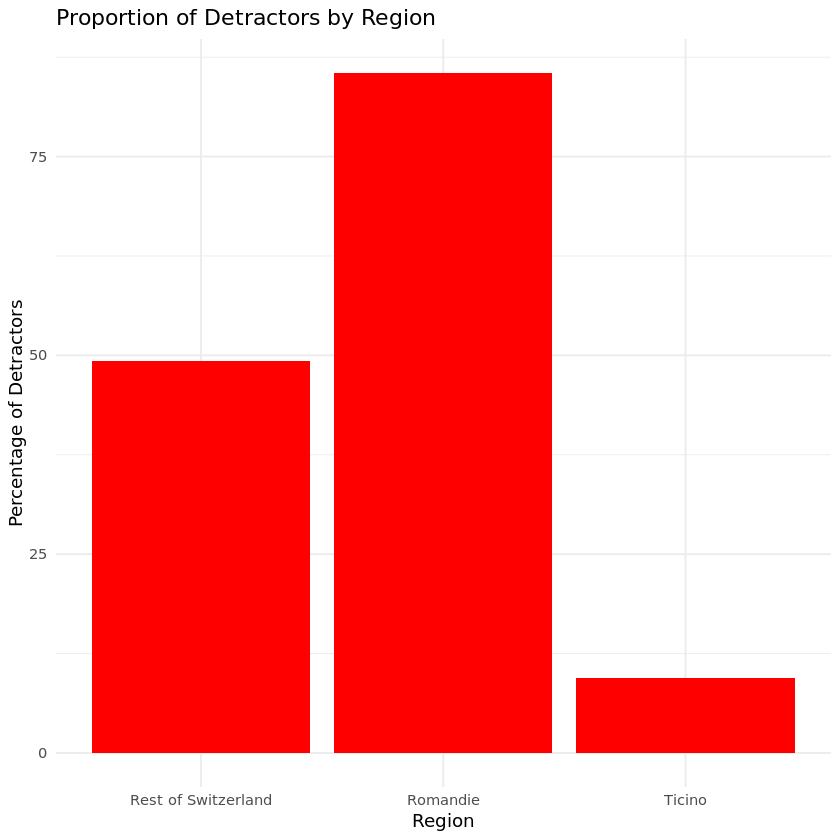

In [10]:
# Visualize proportion of detractors by region
ggplot(detractors_by_region, aes(x = Region, y = Proportion)) +
  geom_bar(stat = "identity", fill = "red") +
  labs(title = "Proportion of Detractors by Region", x = "Region", y = "Percentage of Detractors") +
  theme_minimal()

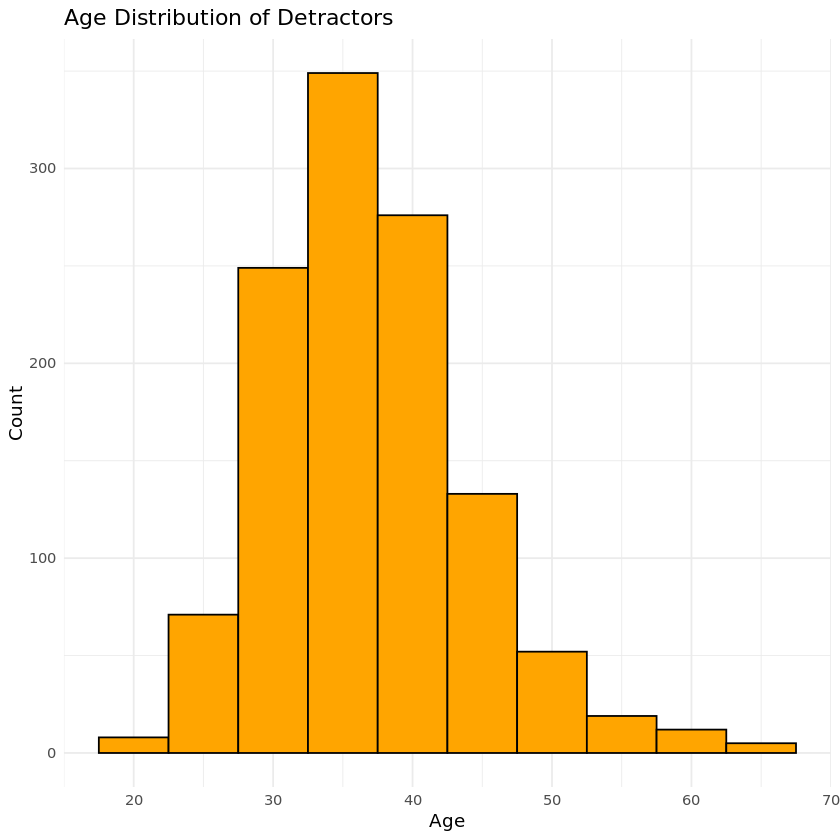

In [11]:
# Age distribution of detractors
ggplot(data %>% filter(Category == "Detractor"), aes(x = Age)) +
  geom_histogram(binwidth = 5, fill = "orange", color = "black") +
  labs(title = "Age Distribution of Detractors", x = "Age", y = "Count") +
  theme_minimal()

In [12]:
# Average premiums by category
avg_premiums <- data %>%
  group_by(Category) %>%
  summarize(Average_Premium = mean(Average_Premium_Paid))

print("Average Premium Paid by Category:")
print(avg_premiums)

[1] "Average Premium Paid by Category:"
# A tibble: 3 × 2
  Category  Average_Premium
  <chr>               <dbl>
1 Detractor           2522.
2 Passive             2526.
3 Promoter            2464.


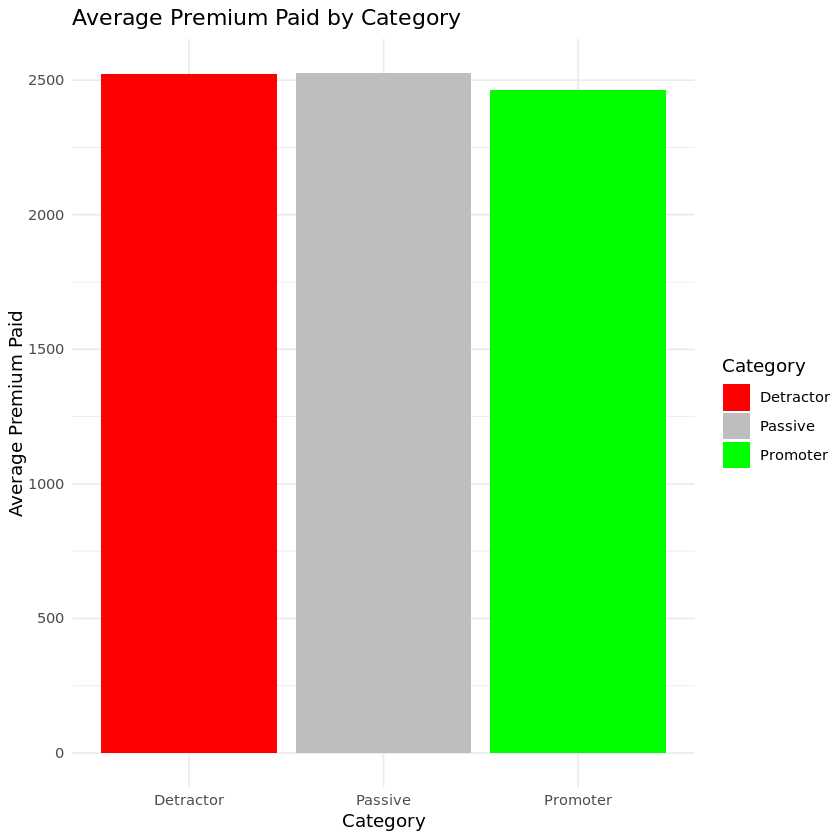

In [13]:
# Visualize average premiums by category
ggplot(avg_premiums, aes(x = Category, y = Average_Premium, fill = Category)) +
  geom_bar(stat = "identity") +
  scale_fill_manual(values = c("red", "gray", "green")) +
  labs(title = "Average Premium Paid by Category", x = "Category", y = "Average Premium Paid") +
  theme_minimal()

In [14]:
# Detractor feedback analysis
detractor_feedback <- data %>%
  filter(Category == "Detractor") %>%
  select(Feedback) %>%
  unnest_tokens(word, Feedback)

# Remove stop words
detractor_feedback <- detractor_feedback %>%
  anti_join(stop_words, by = "word")

# Most common words
common_words <- detractor_feedback %>%
  count(word, sort = TRUE) %>%
  top_n(20)

print("Most Common Words in Detractor Feedback:")
print(common_words)

Selecting by n


[1] "Most Common Words in Detractor Feedback:"
           word   n
1        claims 451
2     expensive 247
3       offered 247
4      premiums 247
5      handling 241
6      compared 238
7   competitors 238
8      customer 238
9    overpriced 238
10       policy 238
11      service 238
12 unresponsive 238
13      process 210
14   resolution 210
15      unhappy 210


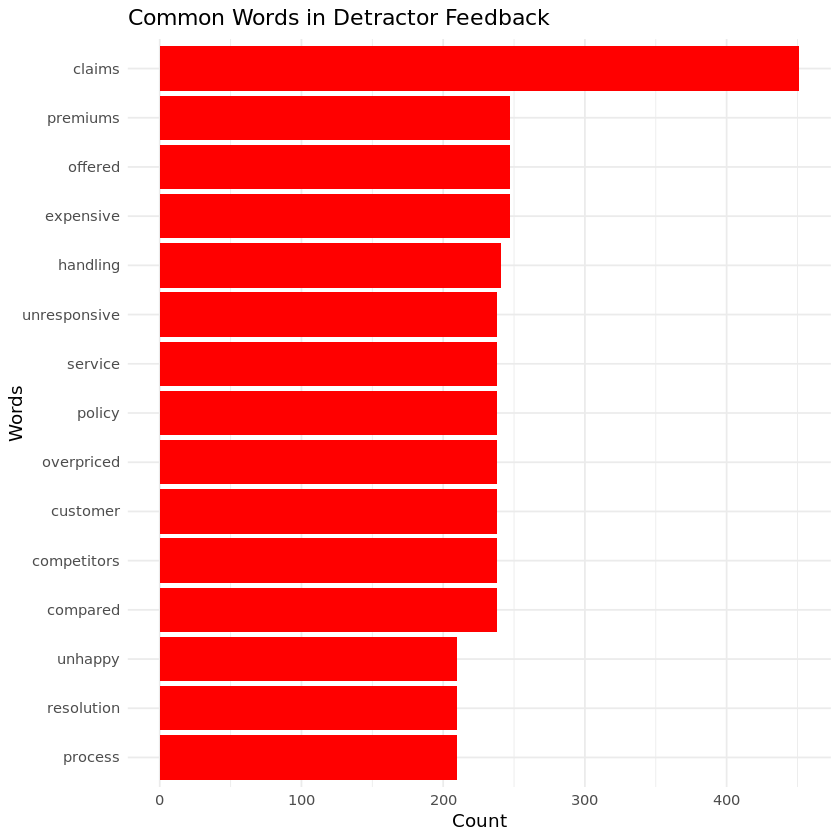

In [15]:
# Visualize most common words
ggplot(common_words, aes(x = reorder(word, n), y = n)) +
  geom_bar(stat = "identity", fill = "red") +
  coord_flip() +
  labs(title = "Common Words in Detractor Feedback", x = "Words", y = "Count") +
  theme_minimal()


In [16]:
# Bigram analysis
bigrams <- data %>%
  filter(Category == "Detractor") %>%
  select(Feedback) %>%
  unnest_tokens(bigram, Feedback, token = "ngrams", n = 2)

common_bigrams <- bigrams %>%
  count(bigram, sort = TRUE) %>%
  top_n(20)

print("Most Common Bigrams in Detractor Feedback:")
print(common_bigrams)

Selecting by n


[1] "Most Common Bigrams in Detractor Feedback:"
                bigram   n
1              are too 247
2        expensive for 247
3             for what 247
4           is offered 247
5         premiums are 247
6         the premiums 247
7        too expensive 247
8              what is 247
9      claims handling 241
10       handling took 241
11            too long 241
12            took too 241
13         compared to 238
14    customer service 238
15       is overpriced 238
16 overpriced compared 238
17           policy is 238
18         service was 238
19          the policy 238
20      to competitors 238
21    was unresponsive 238


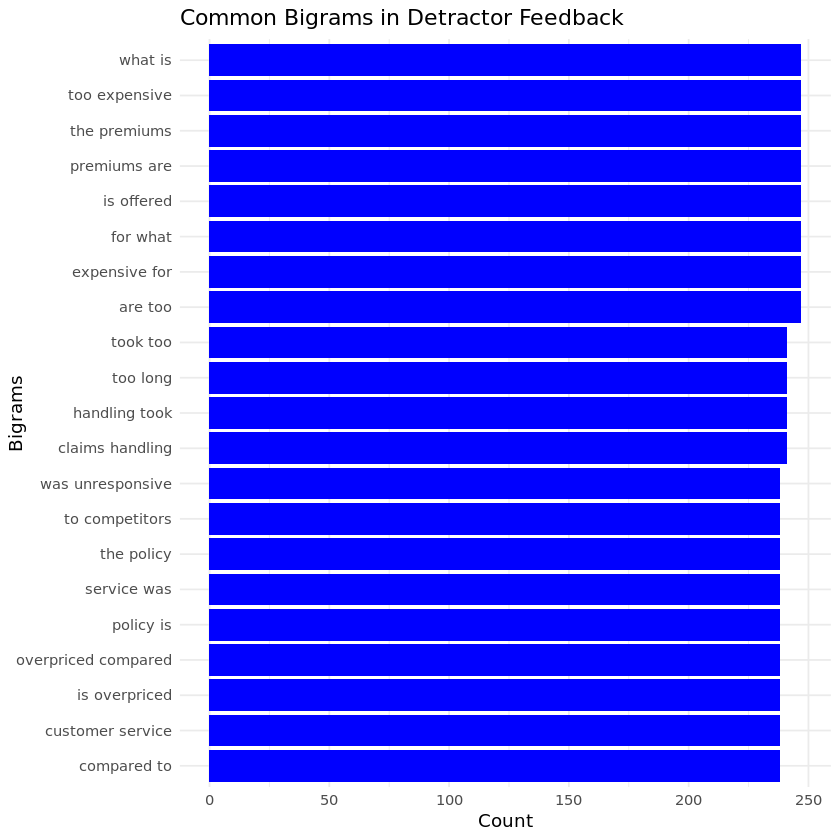

In [17]:

# Visualize common bigrams
ggplot(common_bigrams, aes(x = reorder(bigram, n), y = n)) +
  geom_bar(stat = "identity", fill = "blue") +
  coord_flip() +
  labs(title = "Common Bigrams in Detractor Feedback", x = "Bigrams", y = "Count") +
  theme_minimal()




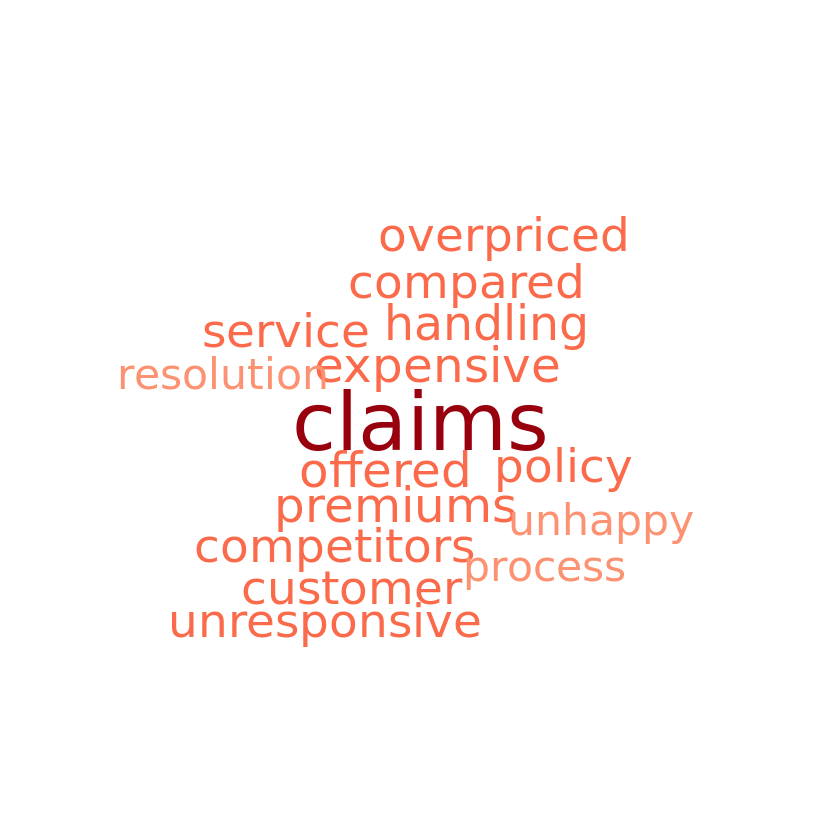

In [18]:
# Word cloud for detractor feedback
wordcloud(words = common_words$word, freq = common_words$n, min.freq = 1,
          max.words = 100, colors = brewer.pal(8, "Reds"), random.order = FALSE)